In [1]:
!pip install -q seaborn scikit-learn matplotlib pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Task 1
import pandas as pd

df = pd.read_csv('/content/customer_churn_data.csv')

print("Information:")
df.info()
print("\nShape:")
print(df.shape)
print("\nNull Values:")
print(df.isnull().sum())
print("\nSummary")
df.describe()


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  obj

,age,senior_citizen,tenure,monthly_charges,total_charges,customer_satisfaction,support_calls
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.662500,0.092300,22.216800,53.640204,1192.146321,3.399300,2.007400
std,14.397976,0.289463,19.963232,17.047669,1193.960345,1.069193,1.415184
min,18.000000,0.000000,1.000000,20.050000,20.320000,1.000000,0.000000
25%,34.000000,0.000000,6.000000,40.407500,306.305000,3.000000,1.000000
50%,44.000000,0.000000,16.000000,51.770000,796.955000,3.000000,2.000000
75%,55.000000,0.000000,33.000000,66.280000,1681.077500,4.000000,3.000000
max,80.000000,1.000000,72.000000,111.810000,7078.800000,5.000000,9.000000


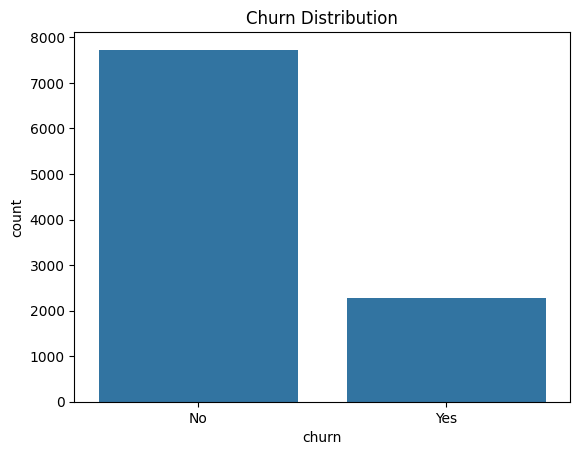

Churn rate:
 churn
No     77.28
Yes    22.72
Name: proportion, dtype: float64


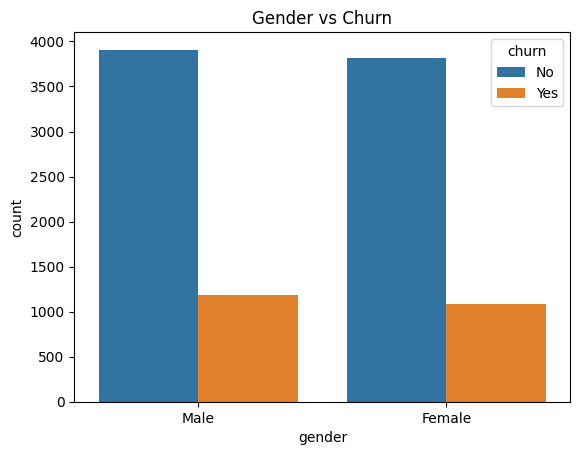

In [4]:
# Task 2
sns.countplot(data=df, x='churn')
plt.title("Churn Distribution")
plt.show()

churn_rate = df['churn'].value_counts(normalize=True) * 100
print("Churn rate:\n", churn_rate)

sns.countplot(data=df, x='gender', hue='churn')
plt.title("Gender vs Churn")
plt.show()


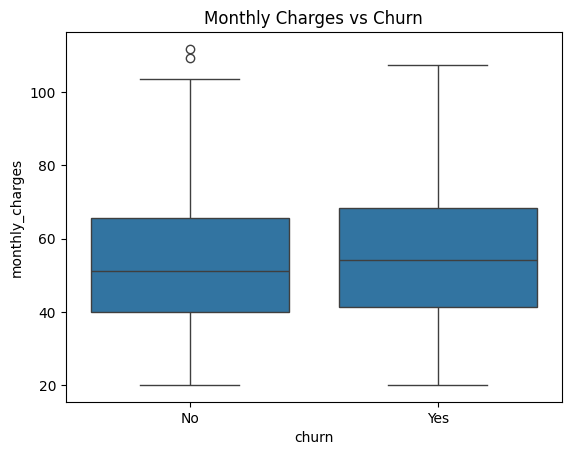

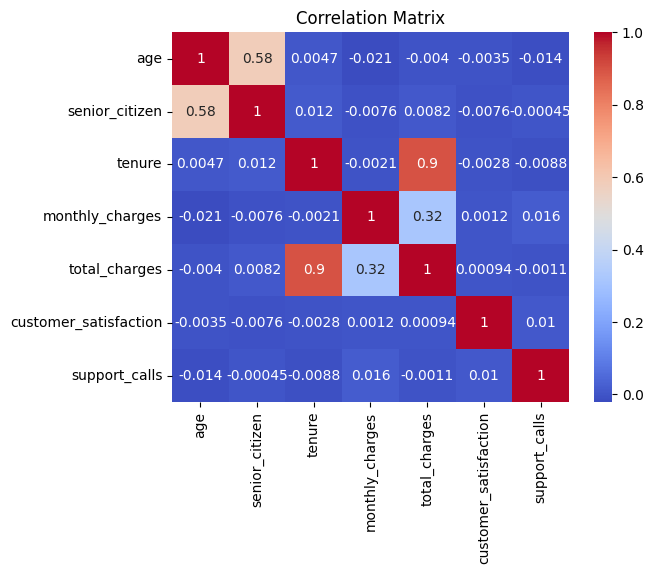

In [5]:
sns.boxplot(data=df, x='churn', y='monthly_charges')
plt.title("Monthly Charges vs Churn")
plt.show()

numerical_features = df.select_dtypes(include=['int64', 'float64'])
corr_mat = numerical_features.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# Task 3
df = df.drop(['customer_id'], axis=1, errors='ignore')

for col in df.select_dtypes('object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('churn', axis=1)
y = df['churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
#  Task 4
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
SVM trained.



Logistic Regression
Accuracy: 0.7815
Precision: 0.5909090909090909
Recall: 0.1956989247311828
F1 Score: 0.2940226171243942


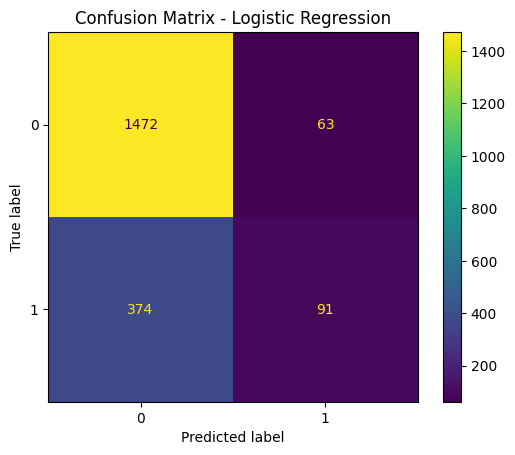


Decision Tree
Accuracy: 0.679
Precision: 0.3240556660039761
Recall: 0.35053763440860214
F1 Score: 0.3367768595041322


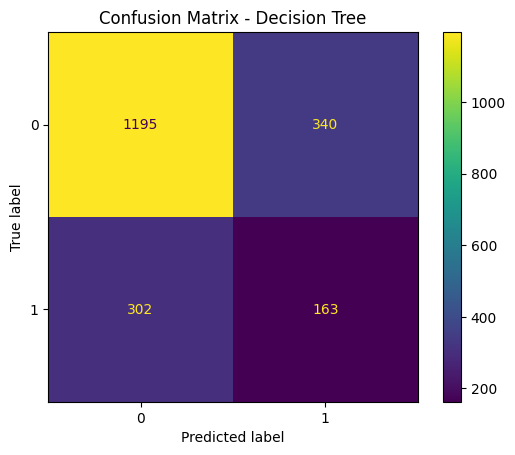


Random Forest
Accuracy: 0.7795
Precision: 0.5789473684210527
Recall: 0.18924731182795698
F1 Score: 0.2852512155591572


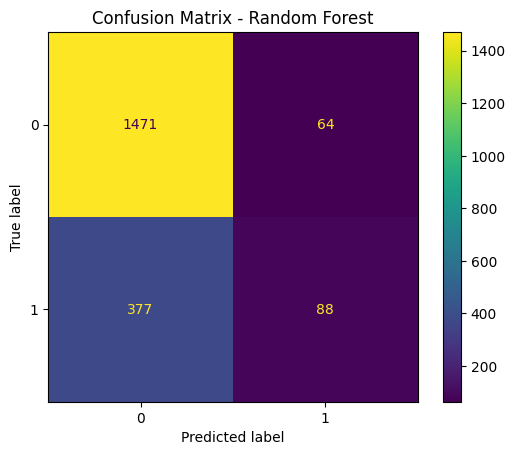


SVM
Accuracy: 0.776
Precision: 0.6
Recall: 0.10967741935483871
F1 Score: 0.18545454545454546


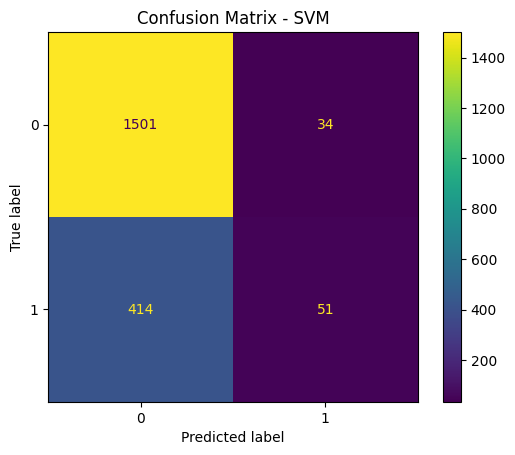

In [8]:
# Task 5
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()